<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/logistic_regression_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
<h3>선형 회귀 방식을 분류에 적용한 알고리즘</h3>

- 선형 회귀 계열 모델
- 회귀가 선형이나 비선형인가는 독립변수가 아닌 가중치(weight)변수가 선형인지 아닌지를 따름
- 시그모이드(sigmoid)함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정함

## 시그모이드 함수

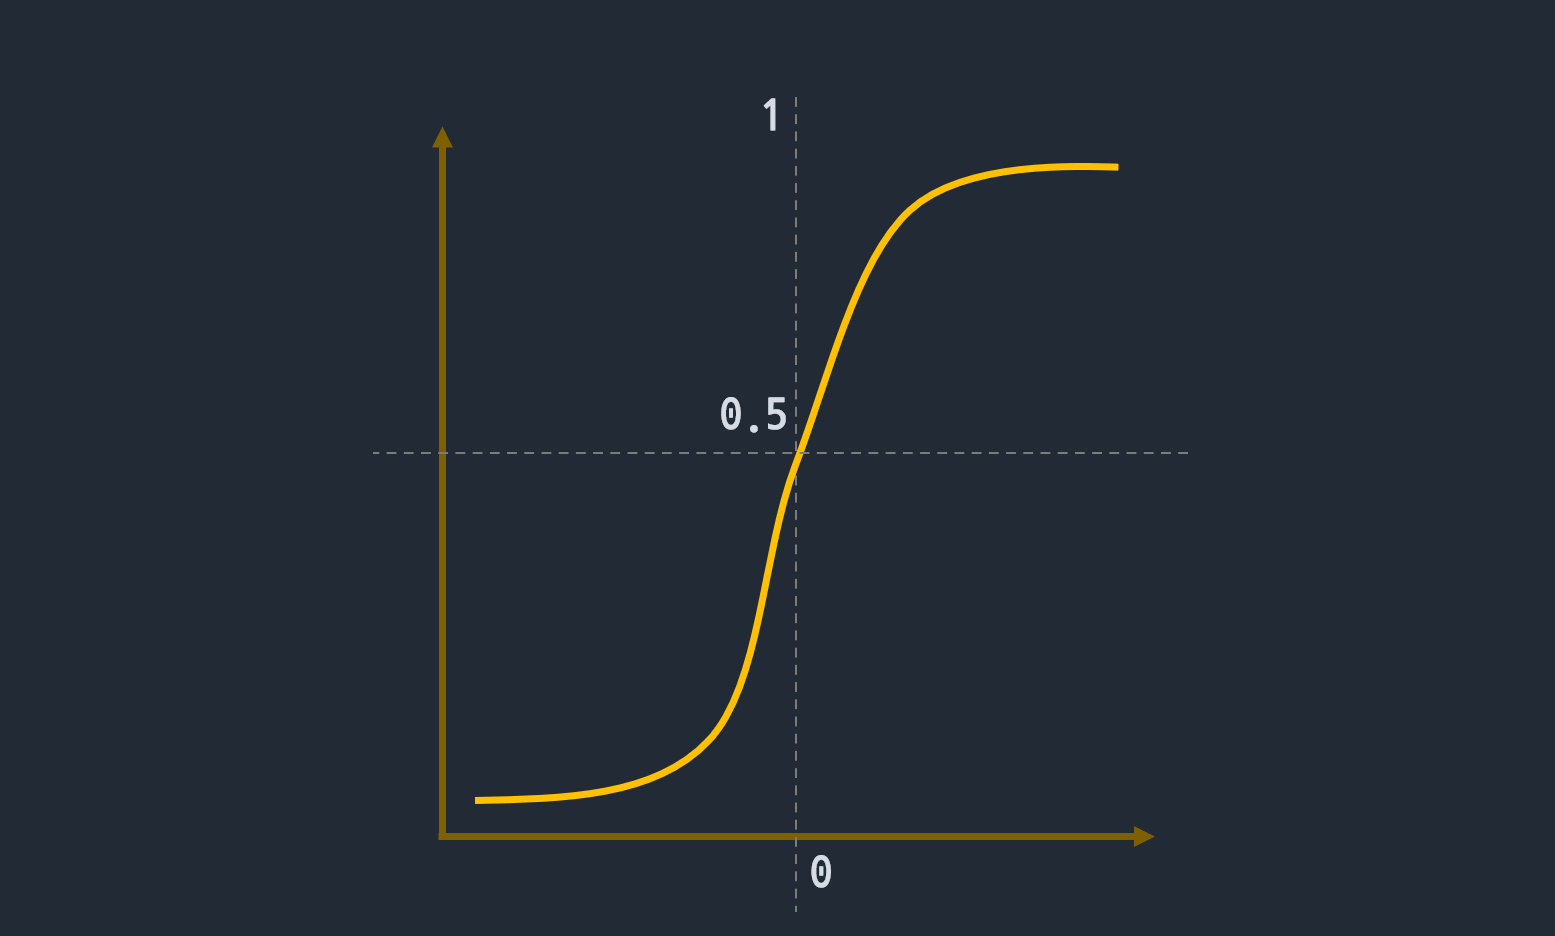

- 많은 자연, 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 시그모이드 함수와 같은 S자 커브 형태를 가짐

$$시그모이드\;함수의\; 정의\;:\;y=\frac{1}{1+e^{-x}}$$

- 시그모이드 함수는 x값이 +, -로 아무리 커지거나 작아져도 y값은 항상 0과 1사이 값을 반환함
- x값이 커지면 1에 근사하며 x값이 작아지면 0에 근사함 x가 0일때는 0.5

##로지스틱 함수 예제
- 위스콘신 유방안 데이터 세트

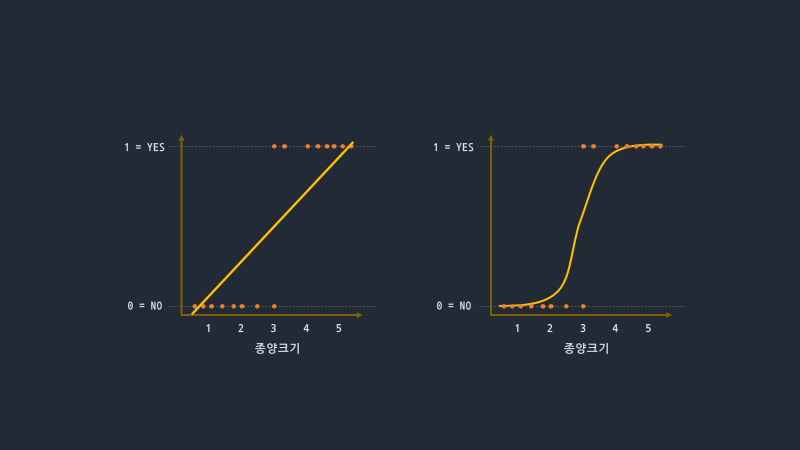

- 양성(1), 음성(0)으로 분류를 한다고 가정함
- 왼쪽의 그림은 선형함수로 표현하고 오른쪽은 시그모이드함수로 표현할때 오른쪽 그림이 더 분류를 잘하는 것으로 보인다.
- 이러한 이유로 로지스틱 회귀 분석이 분류문제에 사용하는 이유이다.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# 데이터를 정규 분포 형태의 스케일링을 적용뒤에 데이터 세트를 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop("target", axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [11]:
#학습 예측 평가 수행
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("accuracy : {:.3f}".format(accuracy_score(y_test, lr_pred)))
print("roc_auc : {:.3f}".format(roc_auc_score(y_test, lr_pred)))

accuracy : 0.977
roc_auc : 0.972


사이킷런의 LogisticRegression의 주요 파라미터
- penalty
  - 규제의 유형을 설정하며 'l2'는 L2규제, 'l1' L1규제
- C
  - 규제 강도를 조절하는 alpha의 역수
  - 즉 $\;C=\frac{1}{alpha}$
  - C값이 작을수록 규제 강도가 큼

In [12]:
#하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {'penalty' : ["l2",'l1'],
          "C" : [0.01,0.1,1,1.5,110]}

grid = GridSearchCV(lr, param_grid = params, scoring = 'accuracy', cv=3)
grid.fit(X_scaled,y)
print("최적 하이퍼 파라미터: {}, 최적 평균 정확도 : {:.3f}".format(grid.best_params_, grid.best_score_))

최적 하이퍼 파라미터: {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.975
